In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
HPtauvals = np.arange(1,100+0.001,1) #to include the endpoint
num_HPtauvals = len(HPtauvals)
num_circuits = 25 #per tau val
OGHPondata = np.loadtxt('OGfrequencytargetpoint1.dat')
didnotevolve = np.where((OGHPondata-.1)**2 > .00000004)
print(didnotevolve)
print(len(didnotevolve[0]))
#print(1-(100*(OGHPondata[didnotevolve]-.1)**2))
print(OGHPondata[didnotevolve])
OGHPondata = np.reshape(OGHPondata,(num_HPtauvals,num_circuits)) #not so important (should all = target)

HPoffdata = np.loadtxt("HPofffrequencytargetpoint1.dat")
HPoffdatacopy = np.copy(HPoffdata)
HPoffdatacopy = np.reshape(HPoffdatacopy,(num_HPtauvals,num_circuits))
HPoffdata[didnotevolve] = -1  #make sure the ones that did not evolve get put at bottom
HPoffdata = np.reshape(HPoffdata,(num_HPtauvals,num_circuits))

(array([   6,   18,   25,   29,  436,  757,  862, 1151, 1178, 1404, 1429,
       1436, 1503, 1610, 1677, 1723, 1767, 1773, 1795, 1817, 1831, 1832,
       1842, 1868, 1887, 1954, 1966, 2036, 2095, 2109, 2179, 2194, 2250,
       2260, 2303, 2338, 2383, 2389, 2419, 2423, 2438, 2451, 2486]),)
43
[0.100301  0.0994036 0.100806  0.10101   0.0974659 0.0738007 0.047619
 0.12987   0.0740192 0.102881  0.0992063 0.042735  0.100301  0.0449035
 0.0591716 0.0997009 0.0507099 0.0453309 0.0389105 0.100806  0.0838926
 0.0430293 0.0511509 0.100503  0.101112  0.167504  0.0565291 0.0996016
 0.0995025 0.0948767 0.0490196 0.0446429 0.10395   0.100301  0.135135
 0.0228885 0.0307692 0.0382263 0.100402  0.0386847 0.0351617 0.0838223
 0.0996016]


In [3]:
print(didnotevolve)

(array([   6,   18,   25,   29,  436,  757,  862, 1151, 1178, 1404, 1429,
       1436, 1503, 1610, 1677, 1723, 1767, 1773, 1795, 1817, 1831, 1832,
       1842, 1868, 1887, 1954, 1966, 2036, 2095, 2109, 2179, 2194, 2250,
       2260, 2303, 2338, 2383, 2389, 2419, 2423, 2438, 2451, 2486]),)


In [4]:
HPtauvals[4::5]

array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
        60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

/var/folders/gv/6v_0dsv15fzft0z3f6rw1zc40000gn/T/ipykernel_20700/714272724.py:13: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cbar.cmap.set_over('white')


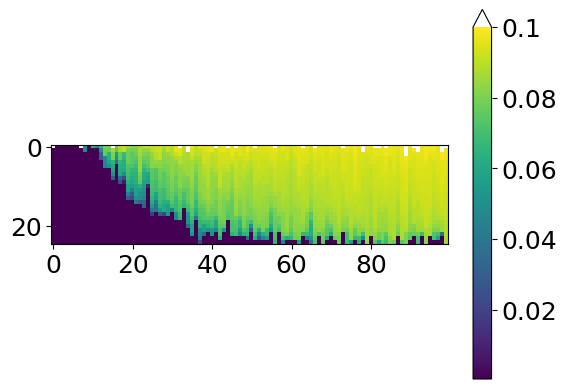

/var/folders/gv/6v_0dsv15fzft0z3f6rw1zc40000gn/T/ipykernel_20700/714272724.py:37: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(im, extend='max',ticks=[.2,.4,.6,.8,1],shrink=.45)
/var/folders/gv/6v_0dsv15fzft0z3f6rw1zc40000gn/T/ipykernel_20700/714272724.py:39: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cbar.cmap.set_over('white')


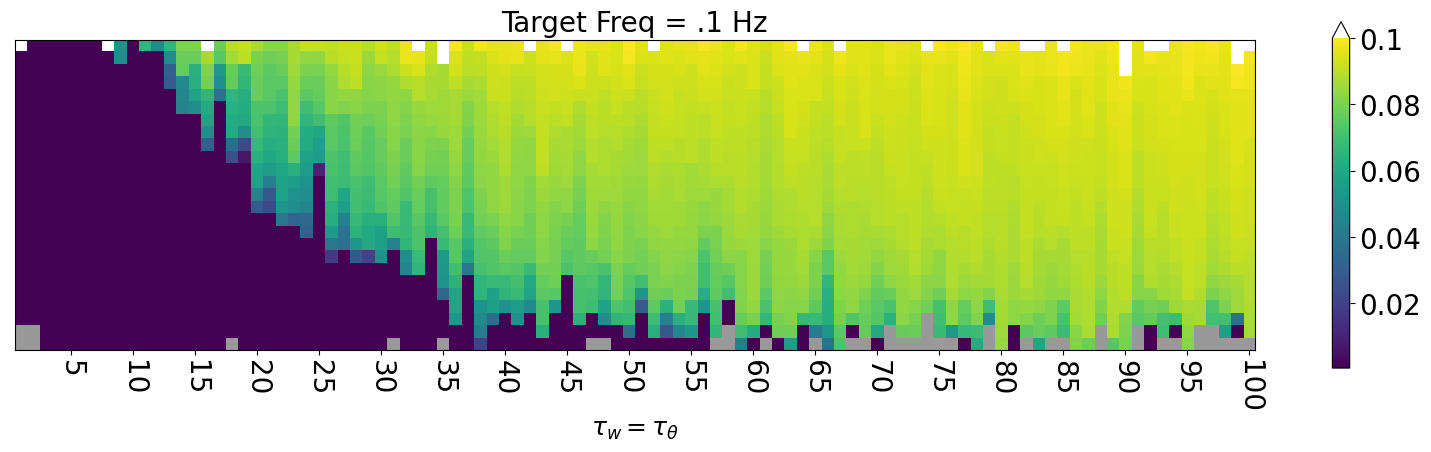

In [9]:
fig,ax=plt.subplots()
a = np.sort(HPoffdatacopy,axis=1)
for i in range(len(a)):
    a[i] = a[i,::-1]
a = np.transpose(a)
norm = plt.Normalize(0, .1)
cmap = plt.cm.get_cmap("viridis").copy()
#norm = plt.Normalize(a.min(), a.max())
rgba = cmap(norm(a))
im = ax.imshow(rgba, interpolation='none')
cbar = fig.colorbar(im, extend='max',ticks=[.2,.4,.6,.8,1])
cbar.ax.set_yticklabels(np.round(np.array([.2,.4,.6,.8,1])*.1,2))
cbar.cmap.set_over('white')
plt.show()   #so we can rip color bar from other plot

b = np.sort(HPoffdata,axis=1)
didnotevolve = np.where(b==-1) #now keep track of where in the reshaped sorted array they are
for i in range(len(b)):
    b[i] = b[i,::-1]
b = np.transpose(b)

fig,ax=plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
# cmap = plt.cm.viridis
#norm = plt.Normalize(a.min(), a.max())
rgba = cmap(norm(b))

# Set the ones that did not evolve to gray...
rgba[(-didnotevolve[1])-1,didnotevolve[0],:3] = .6,.6,.6
#plt.colorbar()
plt.imshow(rgba, interpolation='none')
ax.set_xticks(((HPtauvals-1)[4::5]),labels=HPtauvals[4::5].astype(int),rotation=270,size=20)
ax.set_yticks(())
plt.xlabel(r'$\tau_w = \tau_{\theta}$')
plt.title('Target Freq = .1 Hz',size=20)
cbar = fig.colorbar(im, extend='max',ticks=[.2,.4,.6,.8,1],shrink=.45)
cbar.ax.set_yticklabels(np.round(np.array([.2,.4,.6,.8,1])*.1,2),size=20)
cbar.cmap.set_over('white')
# plt.rcParams.update({'font.size': 18})
plt.show()

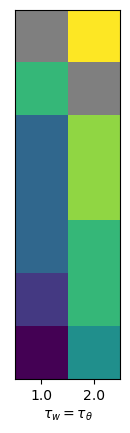

In [31]:
fig,ax=plt.subplots()
a = np.array([[.4,.4,.4,.6,.7,.2,.3],[.6,.7,.7,.7,.8,.6,.5]])
a = np.sort(a,axis=1)
for i in range(len(a)):
    a[i] = a[i,::-1]
HPtauvals = np.arange(1,100+0.001,1) #to include the endpoint
a = np.transpose(a)
cmap = plt.cm.viridis
norm = plt.Normalize(a.min(), a.max())
rgba = cmap(norm(a))

# Set the diagonal to red...
rgba[range(2), range(2), :3] = .5,.5,.5
#plt.colorbar()
plt.imshow(rgba, interpolation='nearest')
#plt.imshow(np.transpose(a))
ax.set_xticks((HPtauvals-1)[0:2],labels=HPtauvals[0:2])
ax.set_yticks(())
plt.xlabel(r'$\tau_w = \tau_{\theta}$')
plt.show()
